In [2]:
import numpy as np
import zipfile
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten,Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import random
import glob
import shutil
import wget
import PIL.Image as Image

In [3]:
data_folder='D:/HSM_code/CroppedYale'

In [16]:
for dirname , dirnames , filenames in os.walk(data_folder):
    
    #数据预处理，将pgm格式转化为 png
    #print(filenames)
    for subdirname in dirnames:
        subject_path = dirname+'/'+subdirname
        print(subject_path)
        for filename in os.listdir(subject_path):
            if len(filename.split('.'))>1 and filename.split('.')[1] == 'pgm':
                if filename[:4] != 'yale':
                    continue
            try:
                im = Image.open(subject_path+'/'+filename)
                im = im.convert("L")
                os.remove(subject_path+'/'+filename)
                im.save(subject_path+'/'+filename.split('.')[0]+'.png', "PNG")
            except IOError:
            #print "I/O error({0}): {1}".format("errno", "strerror") #there is some text files in the path
                pass
            except:
                print ("Unexpected error:", sys.exc_info()[0] )
                raise
            else:  
                print(subject_path+'/'+filename)
                #os.remove(subject_path+'/'+filename)

D:/HSM_code/CroppedYale/yaleB01
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+000E+00.png
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+000E+20.pgm
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+000E+45.pgm
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+000E+90.pgm
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+000E-20.pgm
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+000E-35.pgm
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+005E+10.pgm
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+005E-10.pgm
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+010E+00.pgm
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+010E-20.pgm
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+015E+20.pgm
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+020E+10.pgm
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+020E-10.pgm
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+020E-40.pgm
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+025E+00.pgm
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+035E+15.pgm
D:/HSM_code/CroppedYale/yaleB01/yaleB01_P00A+035E+40.pgm

In [17]:
distribution = {}
subjects = []
for dirname , dirnames , filenames in os.walk(data_folder):
    for subdirname in dirnames:
        subjects.append(subdirname)
        distribution[subdirname] = len(glob.glob(f'{dirname}/{subdirname}/*'))

In [18]:
distribution

{'yaleB01': 68,
 'yaleB02': 67,
 'yaleB03': 67,
 'yaleB04': 67,
 'yaleB05': 67,
 'yaleB06': 67,
 'yaleB07': 67,
 'yaleB08': 67,
 'yaleB09': 67,
 'yaleB10': 67,
 'yaleB11': 67,
 'yaleB12': 67,
 'yaleB13': 67,
 'yaleB15': 67,
 'yaleB16': 67,
 'yaleB17': 67,
 'yaleB18': 67,
 'yaleB19': 67,
 'yaleB20': 67,
 'yaleB21': 67,
 'yaleB22': 67,
 'yaleB23': 67,
 'yaleB24': 67,
 'yaleB25': 67,
 'yaleB26': 67,
 'yaleB27': 67,
 'yaleB28': 67,
 'yaleB29': 67,
 'yaleB30': 67,
 'yaleB31': 67,
 'yaleB32': 67,
 'yaleB33': 67,
 'yaleB34': 67,
 'yaleB35': 67,
 'yaleB36': 67,
 'yaleB37': 67,
 'yaleB38': 67,
 'yaleB39': 67}

In [19]:
for c in subjects:
    if not os.path.isdir(f'train/{c}'):
        os.makedirs(f'train/{c}')
        os.makedirs(f'test/{c}')
        os.makedirs(f'valid/{c}')

In [20]:
train_perc = 0.7
valid_perc = 0.1
test_perc = 0.2

for subject in subjects:
    for c in random.sample(glob.glob(data_folder+f'/{subject}/*'), int(distribution[subject]*train_perc)):
        fname = c.split('/')[1]
        shutil.move(c, f'train/{subject}')
    for c in random.sample(glob.glob(data_folder+f'/{subject}/*'), int(distribution[subject]*valid_perc)):
        fname = c.split('/')[1]
        shutil.move(c, f'valid/{subject}')
    for c in random.sample(glob.glob(data_folder+f'/{subject}/*'), int(distribution[subject]*test_perc)):
        fname = c.split('/')[1]
        shutil.move(c, f'test/{subject}')
    for c in glob.glob(data_folder+f'/{subject}/*'):
        fname = c.split('/')[1]
        shutil.move(c, f'test/{subject}')
    if os.path.isdir(f'test/{subject}/{subject}'):
        shutil.rmtree(f'test/{subject}/{subject}')
    if os.path.isdir(f'test/{subject}/{subject}'):
        shutil.rmtree(f'test/{subject}/{subject}') 
    if os.path.isdir(f'valid/{subject}/{subject}'):
        shutil.rmtree(f'valid/{subject}/{subject}')

In [22]:
datagen = ImageDataGenerator()
train_batches = datagen.flow_from_directory('train', target_size=(256, 256), batch_size=32)
valid_batches = datagen.flow_from_directory('valid', target_size=(256, 256), batch_size=32)
test_batches = datagen.flow_from_directory('test', target_size=(256, 256), batch_size=32, shuffle=False)

Found 1699 images belonging to 38 classes.
Found 218 images belonging to 38 classes.
Found 553 images belonging to 38 classes.


In [23]:
def plot_images(imgs_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(imgs_arr, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

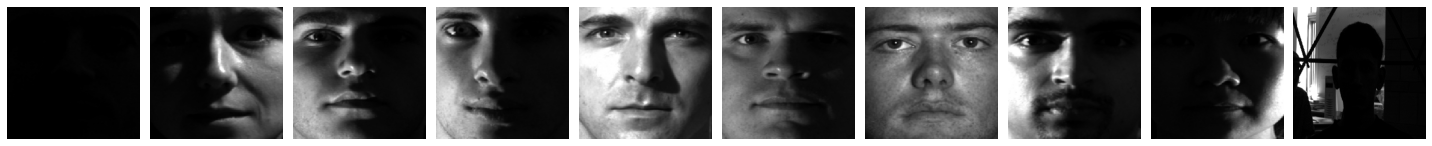

In [24]:
imgs, labels = next(train_batches)
plot_images(imgs)

In [25]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(256,256,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Dropout(0.5),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Dropout(0.5),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=38,activation='softmax')
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        1

In [27]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(train_batches, validation_data=valid_batches, epochs=30, verbose=2, shuffle=True)

Epoch 1/30
54/54 - 8s - loss: 2.7601 - accuracy: 0.4614 - val_loss: 2.7022 - val_accuracy: 0.3394
Epoch 2/30
54/54 - 8s - loss: 2.4324 - accuracy: 0.5003 - val_loss: 2.6697 - val_accuracy: 0.3670
Epoch 3/30
54/54 - 8s - loss: 1.9897 - accuracy: 0.5715 - val_loss: 2.4787 - val_accuracy: 0.4404
Epoch 4/30
54/54 - 8s - loss: 1.6875 - accuracy: 0.6115 - val_loss: 2.3453 - val_accuracy: 0.4358
Epoch 5/30
54/54 - 8s - loss: 1.7099 - accuracy: 0.6257 - val_loss: 2.2430 - val_accuracy: 0.5688
Epoch 6/30
54/54 - 8s - loss: 1.2648 - accuracy: 0.6828 - val_loss: 2.0029 - val_accuracy: 0.6009
Epoch 7/30
54/54 - 8s - loss: 1.0770 - accuracy: 0.7340 - val_loss: 1.6728 - val_accuracy: 0.7385
Epoch 8/30
54/54 - 8s - loss: 0.8604 - accuracy: 0.7816 - val_loss: 1.4591 - val_accuracy: 0.7936
Epoch 9/30
54/54 - 8s - loss: 0.6584 - accuracy: 0.8281 - val_loss: 1.2123 - val_accuracy: 0.8303
Epoch 10/30
54/54 - 8s - loss: 0.5477 - accuracy: 0.8564 - val_loss: 1.0573 - val_accuracy: 0.8670
Epoch 11/30
54/54 -

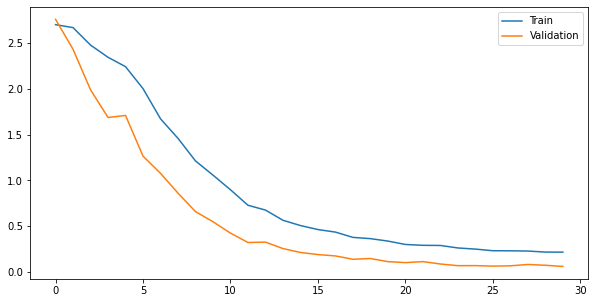

In [31]:
plt.figure(figsize=(10,5))
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['Train', "Validation"])
plt.show()

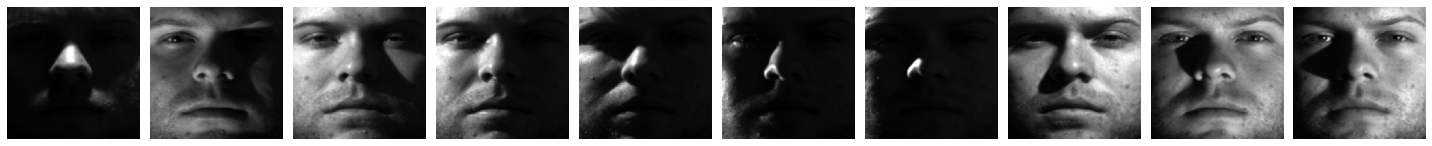

In [32]:
test_imgs, test_labels = next(test_batches)
plot_images(test_imgs)

In [33]:
predictions = model.predict(test_batches, verbose=1)

18/18 [==============================] - 2s 137ms/step


In [34]:
preds = np.round(predictions)
print(f"Test accuracy: {sum(preds.argmax(axis=1) == test_batches.classes)/len(preds)}")

Test accuracy: 0.8806509945750453


In [35]:
matrix = confusion_matrix(test_batches.classes, preds.argmax(axis=-1))
matrix

array([[13,  0,  0, ...,  0,  0,  0],
       [ 2, 11,  0, ...,  0,  1,  0],
       [ 1,  0, 13, ...,  0,  0,  0],
       ...,
       [ 2,  0,  0, ..., 11,  0,  0],
       [ 3,  0,  0, ...,  0, 12,  0],
       [ 0,  0,  0, ...,  0,  0, 14]], dtype=int64)

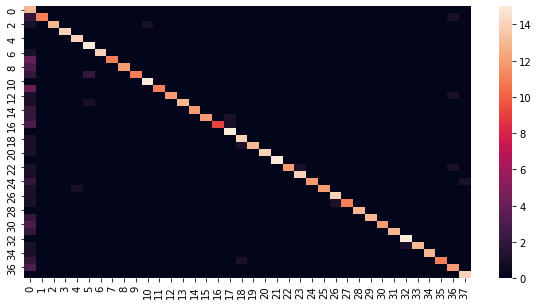

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(matrix)
plt.show()